# Notebook for Pamdeas output analysis
#### This notebook gives you some examples on how to plot data
#### Feel free to modify and adapt it to your needs

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
mpl.rc_file_defaults()

In [5]:
# Folder where the output files are
folder = "../build/"

### Complete method using pandas

In [70]:
# Choose the files to plot
files = [
    'outputpor_M_10.out',
    'outputpor_M_20.out',
    'outputpor_M_50.out',
    'outputpor_M_100.out',
    'outputpor_M_200.out',
    'outputpor_M_300.out',
]

In [71]:
# Black box to open files with pandas
# Create tuple of index and label
print("Reading data...")
try:
    # Check if files is a list
    if type(files) is not list:
        files = [files]

    # Add folder path
    files = [folder+file for file in files]

    # Create dataframe indices and labels
    with open(files[0], 'r') as f:
        ligne = f.readline().split()
        indices = [line.split("_")[0] for line in ligne]
        label = {key: r"$"+line.replace("_", " ")
                 .replace(" ", "$ $")+"$" for (key, line) in zip(indices, ligne)}

    # Create a list of dataframes
    data = [pd.read_csv(file, delim_whitespace=True, names=indices, skiprows=1)
            for file in files]
    print("Ok\n")
    print("List of available columns:")
    print(data[0].columns.tolist())
except:
    print("Problem with files")

# minmax function for auto-adjust and logscale axes


def minmax(data, columns, roundpower):
    def floor_power_of_10(n):
        return np.sign(n)*10**np.floor(np.math.log(np.abs(n), 10)) if n != 0 else 0

    def ceil_power_of_10(n):
        return np.sign(n)*10**np.ceil(np.math.log(np.abs(n), 10)) if n != 0 else 0

    minimum = min([datai.loc[:, columns].min() for datai in data])
    maximum = max([datai.loc[:, columns].max() for datai in data])

    if roundpower:
        minimum, maximum = floor_power_of_10(
            minimum), ceil_power_of_10(maximum)
    return minimum, maximum

Reading data...
Ok

List of available columns:
['t', 'r', 'mass', 'filfac', 'size', 'St', 'cg', 'sigma', 'rhog', 'dustfrac', 'vrel', 'omegak', 'drdt', 'dmdt', 'dragreg', 'porreg']


In [75]:
# Axis
# t, r, mass, filfac, size, St, cg, sigma, rhog,dustfrac, vrel, omegak, drdt, dmdt, drag_reg
x = "size"
y = "filfac"
z = "r"

# Z axis option
z_axe_on = True
round_power = False

# Auto-adjust min-max
aax = True
aay = True
aaz = True

# Adjust min-max manually
xmin, xmax = 1, 5
ymin, ymax = 1e-5, 1e-1
zmin, zmax = 1, 1e1

# Logscale
logx = True
logy = True
logz = True
loglinval = 1e-5  # Symlognorm linthresh & linscale value

# Fontsize
fsize = 14
pointsize = 0.1

# Legend box location
location = "best"

# cmap
cmap = "rainbow"  # "jet_r"

# Figure options
figname = x+'-'+y+'-'+z if z_axe_on is True else x+'-'+y

figsave = False
figname = 'fig_'+figname+'_frag.png'

In [76]:
# Check if axes are correct
if (x not in label or y not in label or (z_axe_on is True and z not in label)):
    print("Error, quantities not found, use")
else:
    print("x,y,z axes Ok")

x,y,z axes Ok


Creating figure
Your figure ->


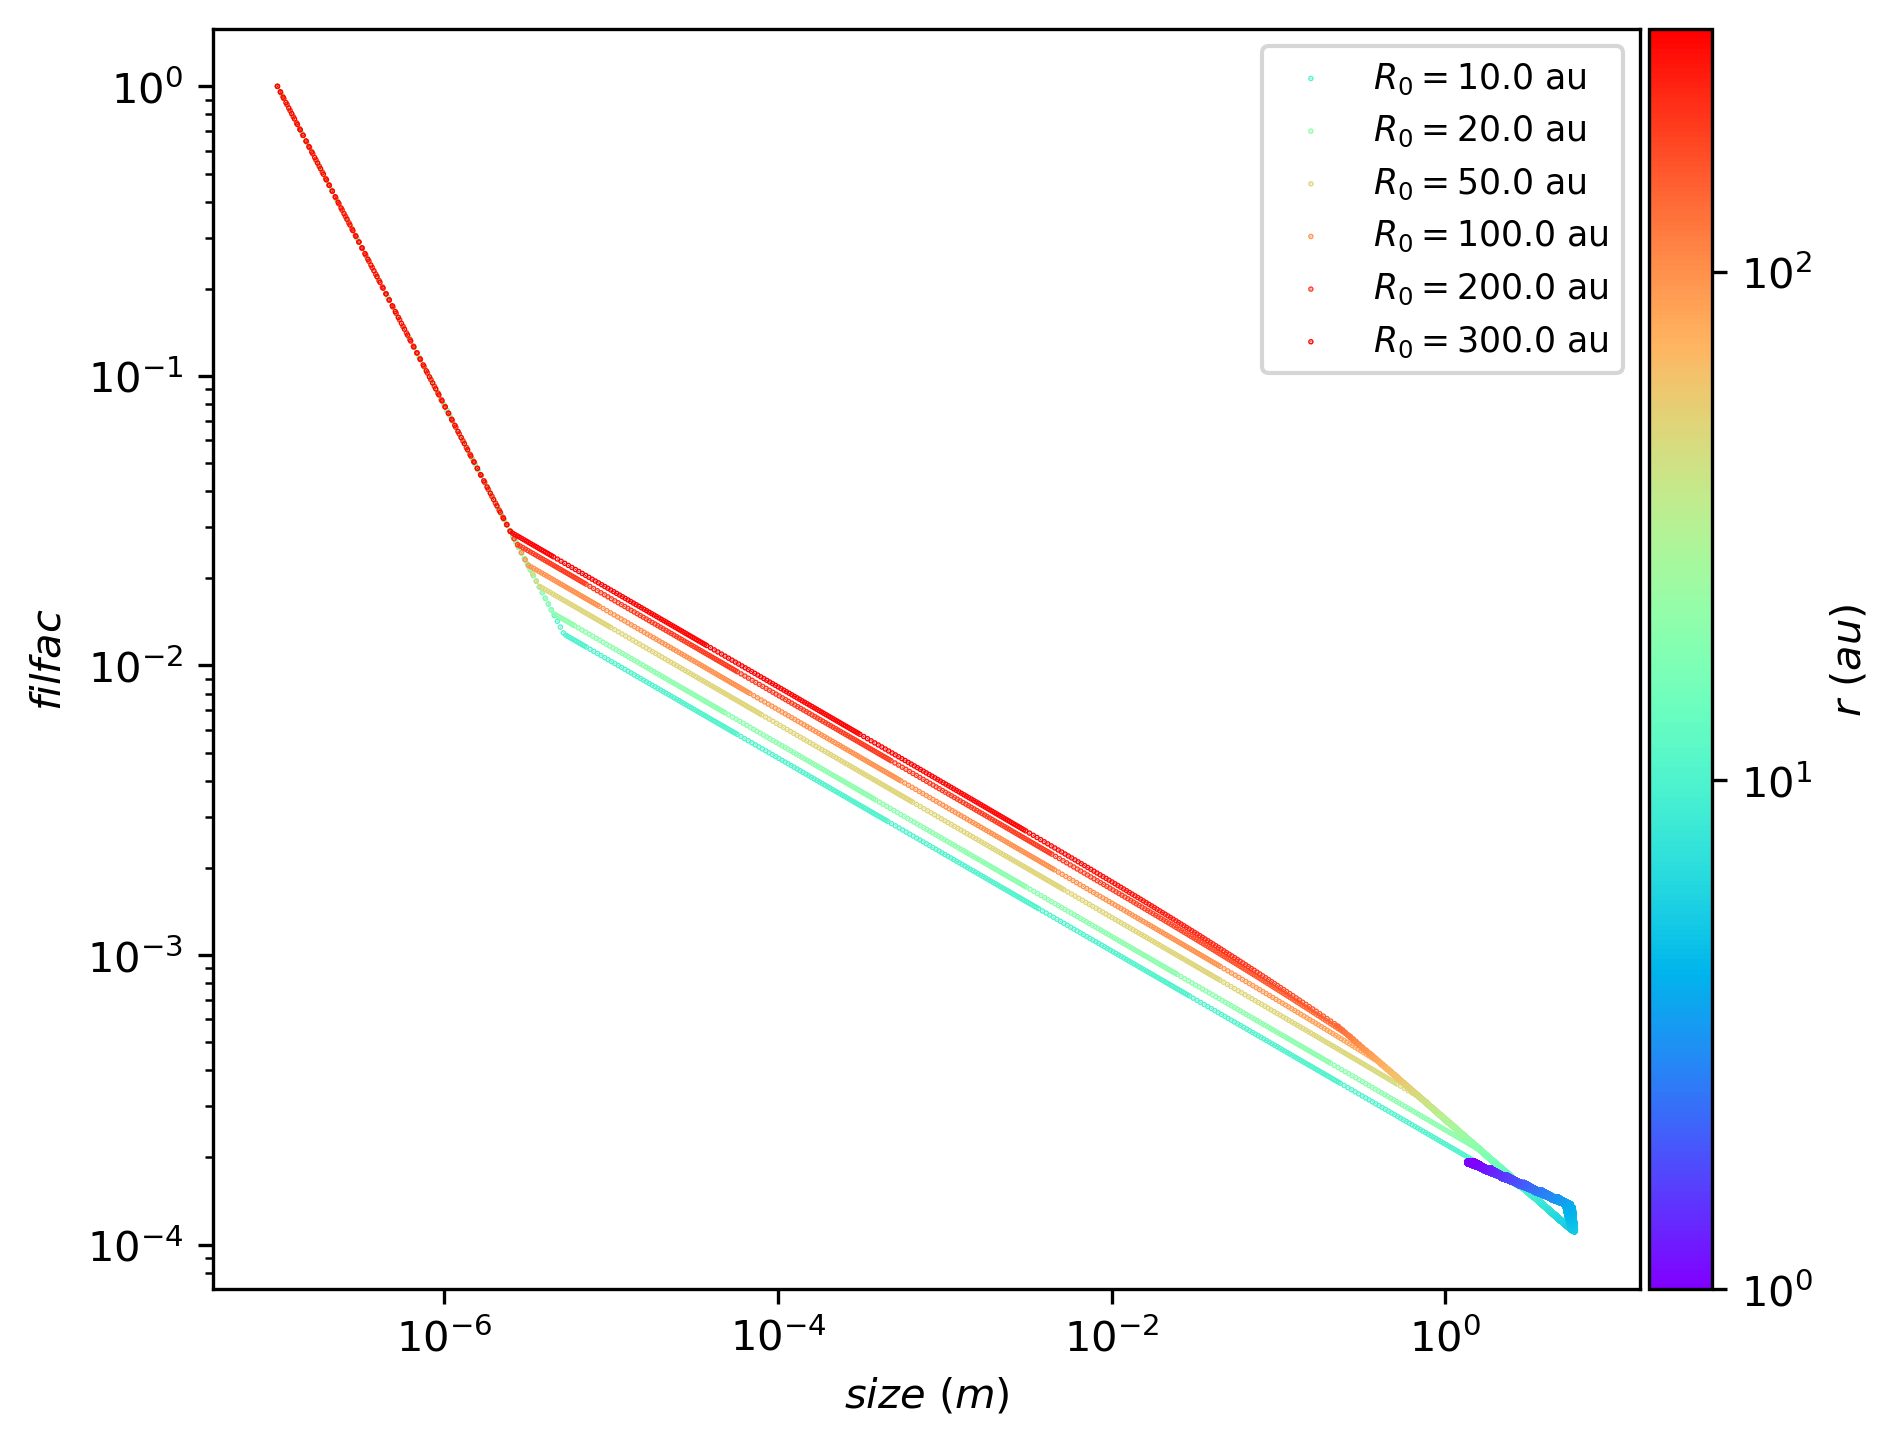

In [77]:
print("Creating figure")
# Fig parameters
fig, axes = plt.subplots(1, 1, sharex='col', sharey='row',
                         gridspec_kw={'hspace': 0, 'wspace': 0, 'left': 0.11,
                                      'right': 0.99, 'bottom': 0.1, 'top': .975},
                         figsize=(6.4, 4.8), dpi=300)

# Plot data according to options
for datai, file in zip(data, files):
    if z_axe_on:   # If the colorbar is on
        if aaz:    # If auto-adjust scale of the colorbar is on
            minimum, maximum = minmax(data, z, round_power)
            if logz:   # If logscale for the colorbar is on
                line = axes.scatter(datai.loc[:, x], datai.loc[:, y], c=datai.loc[:, z],
                                    s=pointsize, norm=colors.SymLogNorm(linthresh=loglinval, linscale=loglinval,
                                                                        vmin=minimum, vmax=maximum, base=10), cmap=cmap)
            else:      # If logscale for the colorbar is off
                line = axes.scatter(datai.loc[:, x], datai.loc[:, y], c=datai.loc[:, z],
                                    s=pointsize, vmin=minimum, vmax=maximum, cmap=cmap)
        else:      # If auto-adjust scale of the tcolorbar is off
            if logz:   # If logscale for the colorbar is on
                line = axes.scatter(datai.loc[:, x], datai.loc[:, y], c=datai.loc[:, z],
                                    s=pointsize, norm=colors.SymLogNorm(linthresh=loglinval, linscale=loglinval,
                                                                        vmin=zmin, vmax=zmax, base=10), cmap=cmap)
            else:      # If logscale for the colorbar is off
                line = axes.scatter(datai.loc[:, x], datai.loc[:, y], c=datai.loc[:, z],
                                    s=pointsize, vmin=zmin, vmax=zmax, cmap=cmap)
    else:   # If the colorbar is off
        line, = axes.plot(datai.loc[:, x], datai.loc[:, y], lw=1, ls="-")

    # Set the label for each grain
    line.set_label(r"$R_0=$" + str(datai.r[0]) + " au")

# Display the colorbar
if z_axe_on:
    clb = fig.colorbar(line, pad=0.005)
    clb.set_label(label[z])

# Axes and labels
if logx:
    axes.set(xscale='log')
if logy:
    axes.set(yscale='log')
if not aax:
    axes.set(xlim=(xmin, xmax))
if not aay:
    axes.set(ylim=(ymin, ymax))

axes.set(xlabel=label[x])
axes.set(ylabel=label[y])
axes.legend(fontsize='small', loc=location)

if figsave:
    plt.savefig(figname, bbox_inches='tight')
    print(figname+" saved")

print("Your figure ->")

plt.show()

### Simpler method by hands without pandas

In [64]:
# figure options
figsave = False
figname = 'outputpor_M_Sphi.png'

# Axis
x = "s"
y = "phi"
z = "r"

zaxe_on = True

# auto-adjust min-max
aax = True
aay = True
aaz = False

# logscale
logx = True
logy = True
logz = True

# fontsize
fsize = 14

# cmap
cmap = 'rainbow'

In [65]:
# The different columns in the files
data = {
    "t": 0,         "tmin": 1,          "tmax": 1e6,        "tlabel": r"$t$ (yr)",
    "r": 1,         "rmin": 1,          "rmax": 300,        "rlabel": r"$R$ (au)",
    "m": 2,         "mmin": 1e-18,      "mmax": 1e16,       "mlabel": r"$mass$ (kg)",
    "phi": 3,       "phimin": 1e-5,     "phimax": 1,        "philabel": r"$\phi$",
    "s": 4,         "smin": 5e-8,       "smax": 5e6,        "slabel": r"$size$ (m)",
    "St": 5,        "Stmin": 1e-7,      "Stmax": 1e4,       "Stlabel": r"St",
    "cg": 6,        "cgmin": 50,        "cgmax": 700,       "cglabel": r"$c_g$ (m/s)",
    "sigma": 7,     "sigmamin": 1,      "sigmamax": 2e3,    "sigmalabel": r"$\Sigma_g$ (kg/m$^{2}$)",
    "rhog": 8,      "rhogmin": 1e-14,   "rhogmax": 1e-5,    "rhoglabel": r"$\rho_g$ (kg/m$^{3}$)",
    "dustfrac": 9,  "dustfracmin": 1e-3, "dustfracmax": 1,   "dustfraclabel": r"$\epsilon$",
    "vrel": 10,     "vrelmin": 1e-3,    "vrelmax": 1e2,     "vrellabel": r"$v_{rel}$ (m/s)",
    "omegak": 11,   "omegakmin": 1e-12, "omegakmax": 1e-6,  "omegaklabel": r"$\Omega_k$ (s$^{-1}$)",
    "drdt": 9,      "drdtmin": 1e-13,   "drdtmax": 1e-9,    "drdtlabel": r"$dR/dt$ (au/s)",
    "dmsdt": 9,     "dmsdtmin": 1e-25,  "dmsdtmax": 1e-2,   "dmsdtlabel": r"$dmsdt$ ((kg-m)/s)",
    "dragregime": 10,  "dragregimelabel": r"$Drag regime$",
    "porregime": 10,  "porregimelabel": r"$Porous regime$",
}

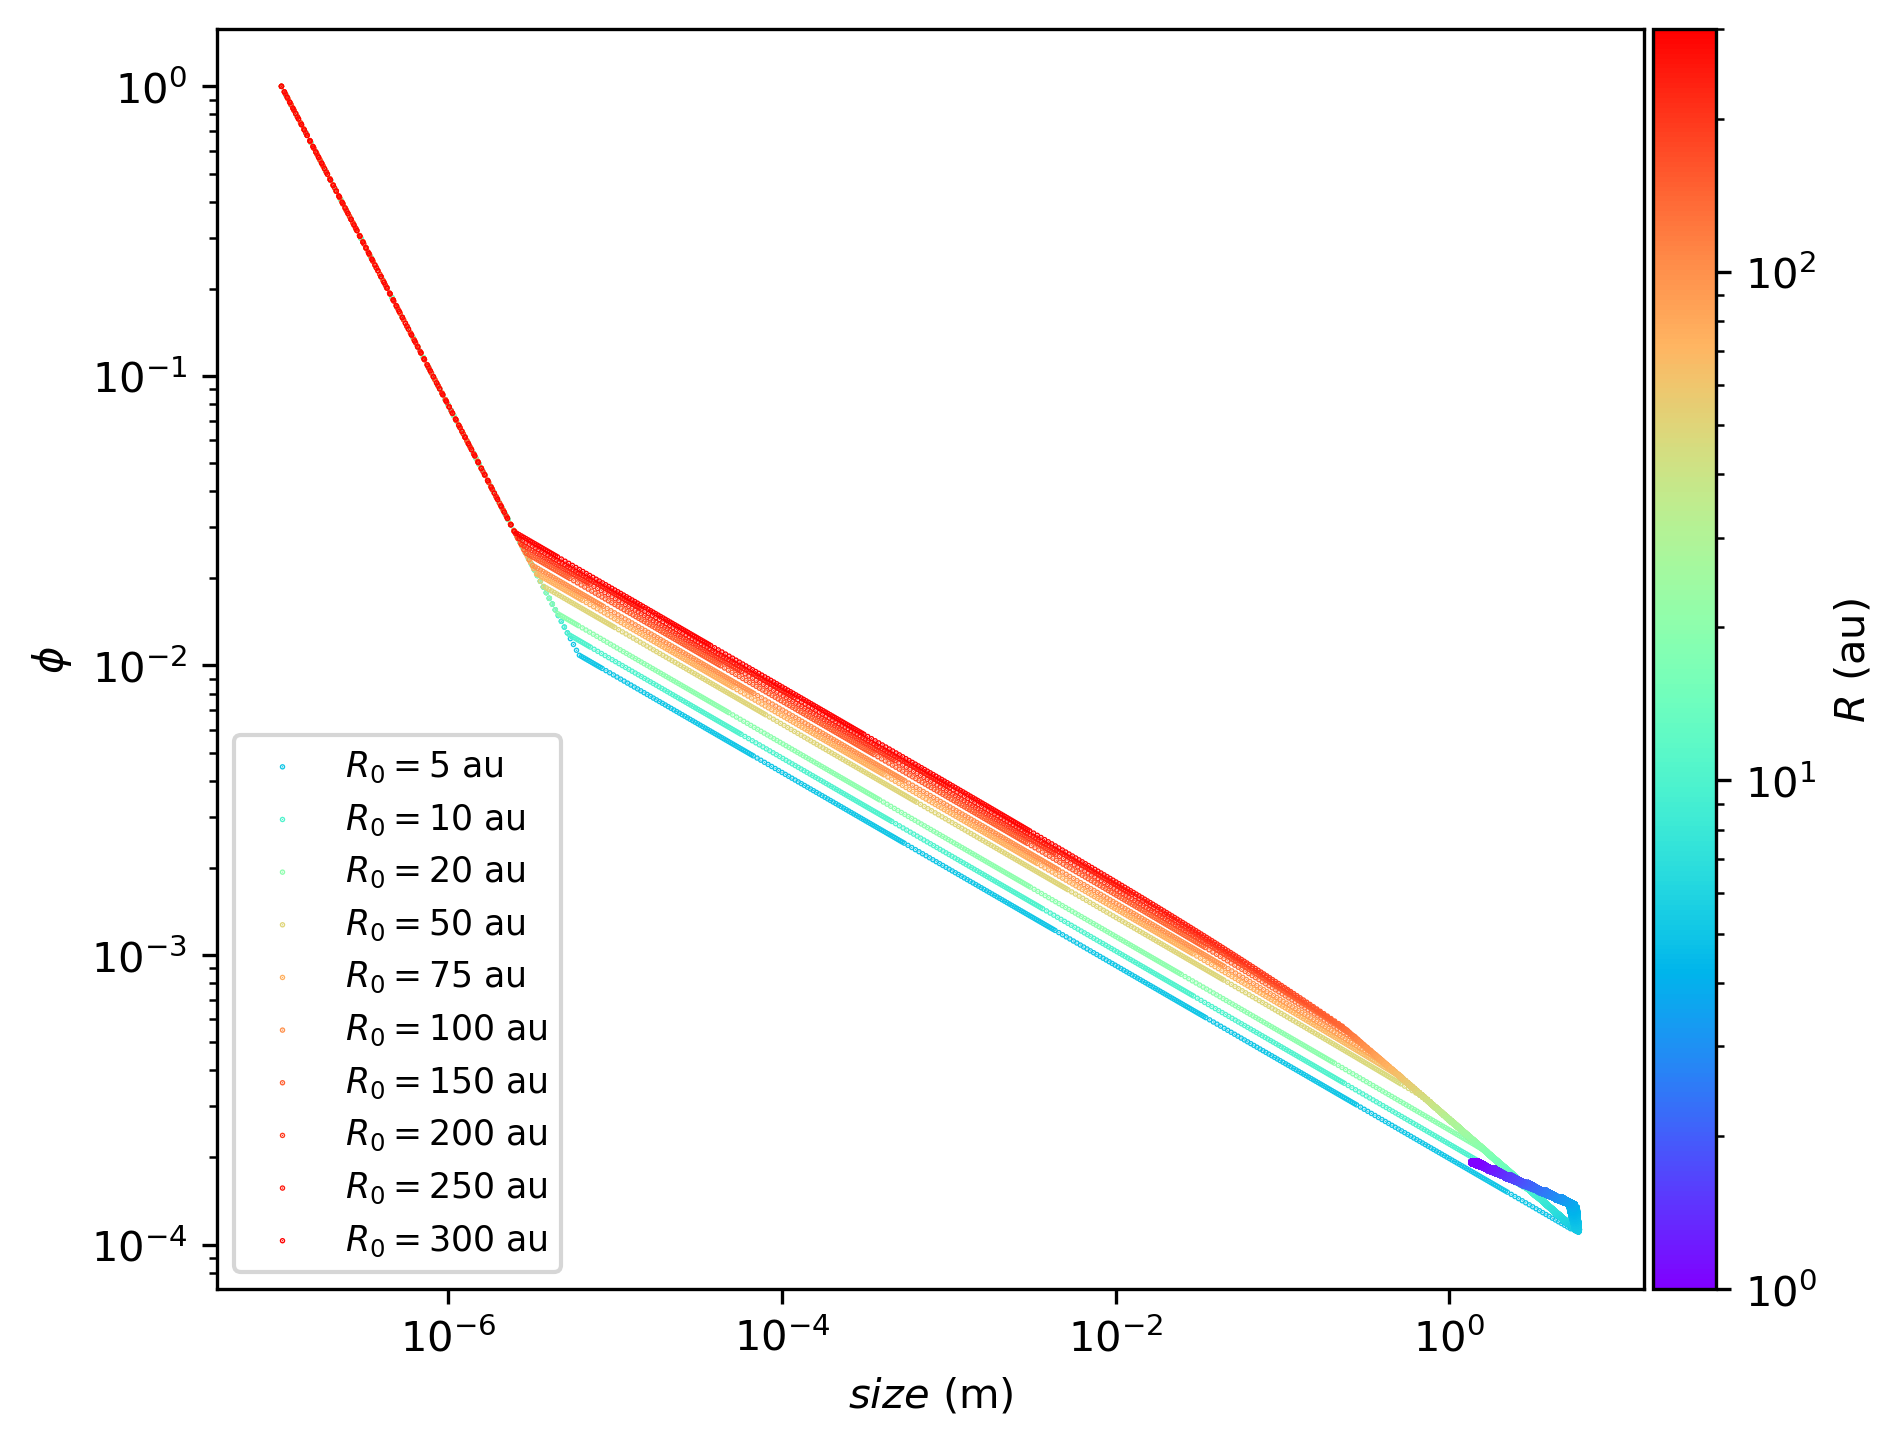

In [66]:
# data

# Choose the radius
radius0 = [5, 10, 20, 50, 75, 100, 150, 200, 250, 300]
col = ['k', 'g', 'b', 'tab:orange', 'tab:purple',
       'tab:brown', 'c', 'tab:pink', 'm', 'y']

# Fig parameters
fig, axes = plt.subplots(1, 1, sharex='col', sharey='row',
                         gridspec_kw={'hspace': 0, 'wspace': 0, 'left': 0.11,
                                      'right': 0.99, 'bottom': 0.1, 'top': .975},
                         figsize=(6.4, 4.8), dpi=300)
# Read the files
for i in range(len(radius0)):
    file = folder+'outputpor_M_' + str(radius0[i]) + '.out'
    with open(file, 'r') as f:
        next(f)
        X = []
        Y = []
        Z = []
        for line in f:
            myline = line.split()
            X.append(float(myline[data[x]]))
            Y.append(float(myline[data[y]]))
            Z.append(float(myline[data[z]]))
# Plot the file you just read
    if zaxe_on is True:
        if aaz is False:
            if logz is True:
                if data[z+"min"] == 0:
                    data[z+"min"] = 0.01
                line = axes.scatter(X, Y, c=Z, s=0.1, norm=colors.LogNorm(
                    data[z+"min"], data[z+"max"]), cmap=cmap)
            else:
                line = axes.scatter(
                    X, Y, c=Z, s=0.1, vmin=data[z+"min"], vmax=data[z+"max"], cmap=cmap)
        else:
            if logz is True:
                if min(Z) == 0:
                    line = axes.scatter(X, Y, c=Z, s=0.1,
                                        norm=colors.LogNorm(0.01, max(Z)), cmap=cmap)
                else:
                    line = axes.scatter(X, Y, c=Z, s=0.1,
                                        norm=colors.LogNorm(min(Z), max(Z)), cmap=cmap)
            else:
                line = axes.scatter(X, Y, c=Z, s=0.1, vmin=min(
                    Z), vmax=max(Z), cmap=cmap)
    else:
        line = axes.scatter(X, Y, c=col[i], s=0.1)
    line.set_label(r"$R_0=$" + str(radius0[i]) + " au")


if zaxe_on is True:
    clb = fig.colorbar(line, pad=0.005)
    clb.set_label(data[z+"label"])

# Axes and labels
if logx is True:
    axes.set(xscale='log')
if logy is True:
    axes.set(yscale='log')
if aax is False:
    axes.set(xlim=(data[x+"min"]*0.7, data[x+"max"]*1.3))
if aay is False:
    axes.set(ylim=(data[y+"min"]*0.7, data[y+"max"]*1.3))

axes.set(xlabel=data[x+"label"])
axes.set(ylabel=data[y+"label"])
axes.legend(fontsize='small', loc='lower left')

if figsave is True:
    plt.savefig(figname, bbox_inches='tight')